# Project Title - dashboard

In [1]:
# imports
import load_stocks as stocks
import Datatable as dtb

## Panel Dashboard

step 1. compile the model
step 2. model summary
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 5)              140       
_________________________________________________________________
flatten (Flatten)            (None, 25)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 26        
Total params: 166
Trainable params: 166
Non-trainable params: 0
_________________________________________________________________
step 3. Train the model
Epoch 1/35
616/616 [==============================] - 2s 1ms/step - loss: 5.2258e-04
Epoch 2/35
616/616 [==============================] - 1s 1ms/step - loss: 0.0014
Epoch 3/35
616/616 [==============================] - 1s 1ms/step - loss: 0.0012
Epoch 4/35
616/616 [==============================] - 1s 1ms/step - l

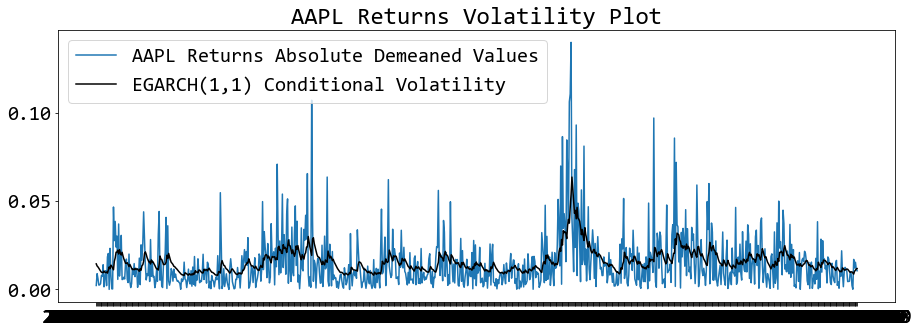

In [2]:
title = stocks.ml.pn.pane.Markdown(
    """
# Project Title
""",
    width=800,
)

fig = stocks.ml.plt.Figure(figsize=(18, 16))
ax = fig.add_subplot(111)
stocks.plot_correlations(param_ax=ax)

# Create a tab layout for the dashboard
tabs = stocks.ml.pn.Tabs(
    ("Original Data", stocks.ml.pn.Column('Stocks:' + stocks.listOfStocks_ToString(),
                                'Stock data since 2018:',
                                 dtb.generate_datatable(dataframe=stocks.stocks.head()),
                                'AAPL Earnings:',
                                dtb.generate_datatable(dataframe=stocks.apple_earning.head()),
                                'Iphone Launch:',
                                dtb.generate_datatable(dataframe=stocks.iphone_launch.head()),
                                )
     ),
    ("Data Analysis", stocks.ml.pn.Column("Closing Prices:",
                                stocks.plot_closing_prices(),
                                "Correlation Matrix:",
                                stocks.ml.pn.pane.Matplotlib(fig),
                                )
     ),
    ("LSTM RNN Model", stocks.ml.pn.Column(
                                'Stocks - Lags:',
                                dtb.generate_datatable(dataframe=stocks.set_lags().head()),
                                "Combined Lags & Apple Info:",
                                dtb.generate_datatable(dataframe=stocks.combine_lags_appleInfo().head()),
                                "Stocks: Predictions",
                                stocks.plot_predictions_stocks(),
                                )
     ),
    ("Signals", stocks.ml.pn.Column("Signals:",
                                    dtb.generate_datatable(dataframe=stocks.analyze_aapl_signals().head()),
                                    stocks.aapl_signals_plot(),
                          )
     ),
    ("Portfolio Analysis", stocks.ml.pn.Column( "Portfolio Evaluation:",
                                                stocks.plot_portfolio_evaluation()
                                                )
     ),

    ("Trade Evaluation", stocks.ml.pn.Column("AAPL Trade Evaluation",
                                             stocks.plot_trade_evaluation()
                                            )
    ),
)
panel = stocks.ml.pn.Column(stocks.ml.pn.Row(title), tabs, width=1200)

## Serve the Panel Dashboard

Column(width=1200)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Markdown(str)
            [2] HTML(str, sizing_mode='stretch_width')
            [3] Markdown(str)
            [4] HTML(str, sizing_mode='stretch_width')
            [5] Markdown(str)
            [6] HTML(str, sizing_mode='stretch_width')
        [1] Column
            [0] Markdown(str)
            [1] HoloViews(NdOverlay)
            [2] Markdown(str)
            [3] Matplotlib(Figure)
            [4] Markdown(str)
            [5] HTML(str, sizing_mode='stretch_width')
            [6] Markdown(str)
            [7] HoloViews(Curve)
        [2] Column
            [0] Markdown(str)
            [1] HTML(str, sizing_mode='stretch_width')
            [2] Markdown(str)
            [3] HTML(str, sizing_mode='stretch_width')
            [4] Markdown(str)
            [5] HoloViews(NdOverlay)
        [3] Column
            [0] Markdown(str)
            [1] Str(None)
        [4] Column
            [0] Markdown(str)
            [1] HTML(str, sizing_mode='stretch_width')
            [2] HoloViews(Overlay)
        [5] Column
            [0] Markdown(str)
            [1] HoloViews(Table)
        [6] Column
            [0] Markdown(str)
            [1] HoloViews(Table)
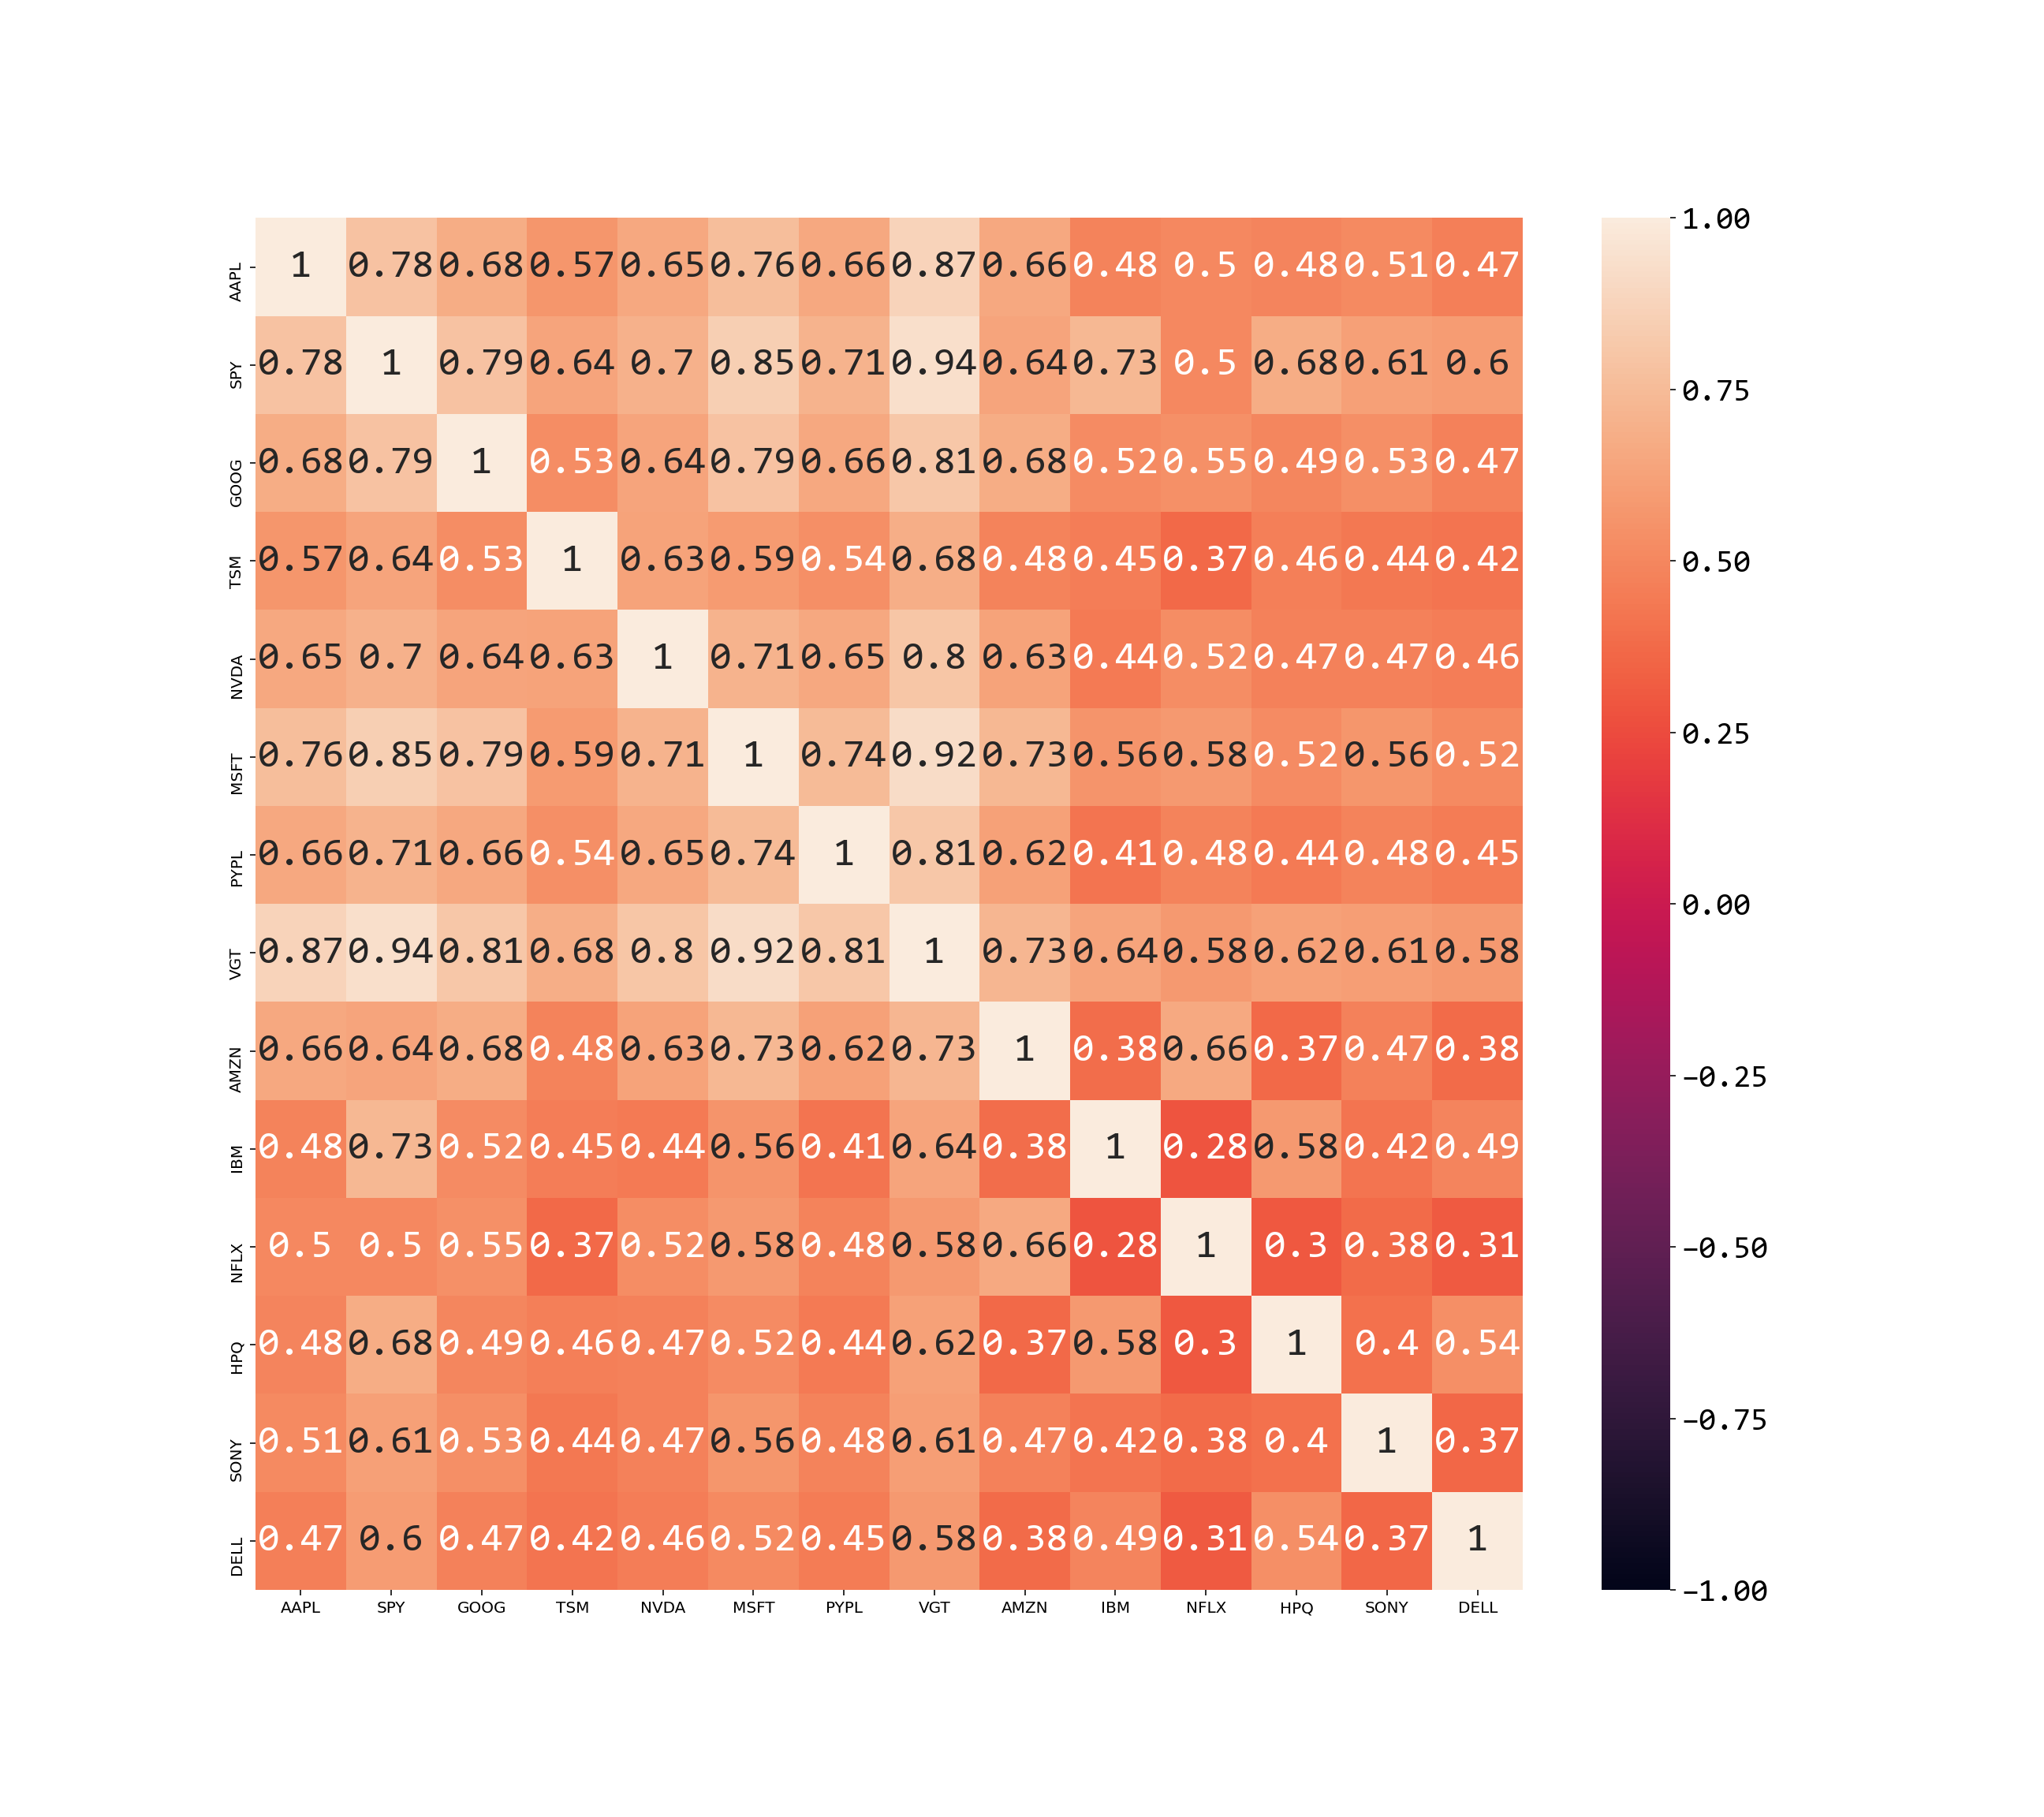

In [3]:
# Serve the# dashboard
panel.servable()